# Prepoznavanje oblika

Autor: Djordje Marjanovic 2016/0120

## Zadatak 1

Za bazu rukom pisanih samoglasnika, koja je dostupna na sajtu predmeta*
isprojektovati inovativni sistem za prepoznavanje cifara zasnovan na
testiranju hipoteza. Rezultate prikazati u obliku matrice konfuzije. Izveštaj
treba da sadrži kratki opis isprojektovanog sistema, obrazložen izbor
obeležja, kao i karakteristične primere pravilno i nepravilno klasifikovanih
slova.

### Postavka

In [39]:
%reset -f

import random

import cv2
import matplotlib.pyplot as plt
import numpy as np

dataset_dir = "data/Slova/"
letters = ['A', 'E', 'I', 'O', 'U']
dataset_size = 60

### Ucitavanje podataka

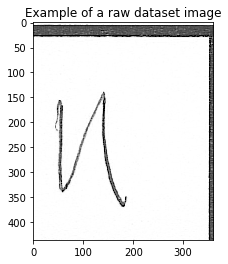

In [40]:
dataset = []
for letter in letters:
    for idx in list(range(1, dataset_size + 1)):
        img = cv2.imread("{}baza{}{:03d}.bmp".format(dataset_dir, letter, idx))
        dataset.append((letter, img))

random_point_index = random.randint(0, len(dataset))

random_point = dataset[random_point_index]
plt.imshow(random_point[1])
plt.title("Example of a raw dataset image")
plt.show()

### Priprema slika

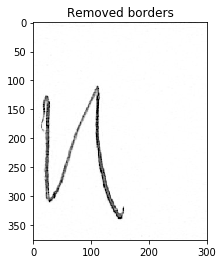

In [41]:
border_size = 30
dataset = [(
    label,
    sample[
        border_size : sample.shape[0] - border_size,
        border_size : sample.shape[1] - border_size
    ][:, :, 0] / 256.0
) for label, sample in dataset]

random_point = dataset[random_point_index]
plt.imshow(random_point[1], cmap = 'gray')
plt.title("Removed borders")
plt.show()

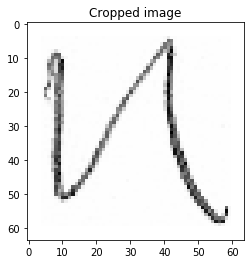

In [42]:
def crop(image: np.ndarray):
    from scipy.ndimage.morphology import binary_erosion, binary_dilation
    binary_threshold = 0.9
    erosion_size = 2
    padding = 4
    final_size = (64, 64)
    
    binary_image = 1.0 * image < binary_threshold
    binary_image = binary_erosion(
        binary_image, 
        structure = np.ones((erosion_size, erosion_size))
    )
    binary_image = binary_dilation(
        binary_image, 
        structure = np.ones((erosion_size, erosion_size))
    )
    
    x, y = np.meshgrid(range(image.shape[1]), range(image.shape[0]))
    x = x * binary_image
    y = y * binary_image
    
    u_bound = max(0, np.min(y[np.nonzero(y)]) - erosion_size)
    b_bound = min(image.shape[0] - 1, y.max() + erosion_size + 1)
    l_bound = max(0, np.min(x[np.nonzero(x)]) - erosion_size)
    r_bound = min(image.shape[1] - 1, x.max() + erosion_size + 1)
    
    cropped_image = image[u_bound: b_bound, l_bound: r_bound]
    resized_image = cv2.resize(
        src = cropped_image,
        dsize = (final_size[1] - 2 * padding, final_size[0] - 2 * padding)
    )
    
    final_image = np.ones(final_size)
    final_image[
        padding: final_size[0] - padding,
        padding: final_size[1] - padding
    ] = resized_image
    
    return final_image

dataset = [(label, crop(sample)) for label, sample in dataset]

random_point = dataset[random_point_index]
plt.imshow(random_point[1], cmap = 'gray')
plt.title("Cropped image")
plt.show()
